<a href="https://colab.research.google.com/github/haechis/DeepLearning_tutorial/blob/main/Do_it_DeepLearning_3_201218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04-1 초기 인공지능 알고리즘과 로지스틱 회귀

#'퍼셉트론'


이진 분류(binary classification)에서 최적의 가중치를 학습하는 퍼셉트론 알고리즘.
 -> 임의 샘플 데이터를 True나 False로 구분하는 것.


 퍼셉트론은 , 선형 회귀 구조에서 , 마지막 단계에서 샘플을 이진 분류하기 위하여 계단 함수(step function)을 사용한다. 그리고 계단 함수를 통과한 값을 다시 가중치와 절편을 업데이트(학습)하는 데 사용한다.

 "선형 함수"

 -> w_1 * x_1 + w_2 * x_2 + b = z

 " step function"

 z가 0보다 크거나 같으면 1, 0보다 작으면 -1
 y = 1 (z>0)
   = -1 (else)

  
"선형 함수"를 보면 입력 신호 특성이 두 개이다. 즉, 여러 특성을 고려해야 한다.

일반화하면, 

z = w_1*x_1 + ... + w_n * x_n + b  ==> sigma로 표시..





# '아달린'

퍼셉트론을 개선한 적응형 선형 뉴런 (Adaptive Linear Neuron) 혹은 아달린(Adaline)

아달린은 선형 함수의 결과를 학습에 사용한다. 계단 함수의 결과는 예측에만 활용한다. 

로지스틱 회귀는 아달린의 개선 버전이다.

# 로지스틱 회귀

- 로지스틱 회귀 : logistic regression

w1*x1 + w2*x2 + b => z => (활성화 함수) => a => 임계 함수 => y_hat

                                              |

                                           <-- 역방향 계산


- 로지스틱 회귀는 선형 함수를 통과하여 얻은 z를 임계 함수에 보내기 전에 변형시킨다. 이런 함수를 활성화 함수(activation function)라고 한다.

- 활성화 함수를 통과한 값이 a로 표현 되어 있는데, 앞으로 a는 활성화 함수를 통과한 값이라고 이해하면 된다. 

- 마지막으로 임계 함수를 사용하여 예측을 수행한다. (활성화 함수의 출력값으로 예측)


활성화 함수는 비선형 함수를 사용한다.

p = 1 / (1 + exp(-z))  => 시그모이드 함수

# 시그모이드 함수로 확률을 만든다

## 시그모이드 함수의 역할

출력값 z는 선형 함수의 결과이다.

z = b + w_1*x_1 + w_2*x_2 + ... + w_n * x_n

이 z는 활성화 함수를 통과하여 a가 된다.

이때 로지스틱 회귀에서 사용하는 활성화 함수인 시그모이드 함수는 z를 0~ 사이의 확률값으로 변환시켜주는 역할을 한다.

즉, 시그모이 함수를 통과한 값 a를 암 종양 판정에 사용하면 '양성 샘플일 확률(악성 종양일 확률)'로 해석할 수 있다. 확률은 해석하기 나름이지만 보통 a가 0.5보다 크면 양성, 그 이하면 음성으로 구분한다.


## 시그모이드 함수가 만들어지는 과정

- 오즈 비 (odds ratio) -> 로짓 함수 (logit func.) -> 시그모이드 함수


- 1. 오즈 비 (odds ratio)

OR(odds ratio) = p / (1-p) (p = 성공 확률)

OR은 0근처에서는 천천히 증가하지만 p가 1에 가까워지면 급격히 증가한다.

- 2. 로짓 함수

logit(p) = log(p / (1-p) )  // 오즈 비에 로그를 취한 것이다.

로짓 함수는 p=0.5에서 0이 되고, p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징이 있다.

- 3. 로지스틱 함수

로짓 함수를 z에 대하여 정리한 것.

p = 1 / (1 + exp(-z))



// 중간 정리 //

- 로지스틱 회귀는 이진 분류가 목표

- 그래서, -무한대 ~ 무한대 범위를 가지는 z의 값을 조절한다.

- 그래서 시그모이드 함수를 활성화 함수로 사용하였다.

- 시그모이드 함수를 사용하면 z를 확률처럼 해석할 수 있다. 그리고 시그모이드 함수의 확률인 a를 0과 1로 구분하기 위하여 마지막에 임계함수를 사용한다. 

- 결과적으로, 입력데이터 x는 0 또는 1의 값으로 나누어진다.

- 그렇다면, 로지스틱 회귀에는 어떤 loss func를 사용하여 가중치와 절편을 업데이트 할까?

- 선형 회귀 처럼 오차 제곱을 이요할까?

- 로지스틱 회귀를 위한 손실 함수인 로지스틱 손실 함수를 알아보자



# 로지스틱 손실 함수를 경사 하강법에 적용해보자!

- 선형 회귀는 정답과 예상값의 오차 제곱이 되는 가중치와 절편을 찾는 것이 목표였음

- 로지스틱 회귀와 같은 분류의 목표는 무엇일까?

- 올바르게 분류된 샘플 데이터의 비율 자체를 높이는 것이 분류의 목표이다.

- 예를 들어, 사과/배/감을 분류하는 문제에서 진짜 사과/배/감을 분류하는 비율을 높이는 것

- 올바르게 분류된 샘플의 비율은 미분 가능한 함수가 아니다.

- 때문에 경사 하강법의 손실 함수로 사용 x / 대신 로지스틱 손실 함수를 사용!



## 로지스틱 손실함수

- 로지스틱 손실 함수는 다중 분류를 위한 손실 함수인 크로스 엔트로피(cross entropy) 손실 함수를 이진 분류 버전으로 만든 것이다. 

- 로지스틱 손실 함수는 다음과 같다. (a: 활성화 함수가 출력한 값 / y: 타깃)

   L = -(y*log(a) + (1-y) * log(1-a))

   -> y => 1인 경우(양성 클래스) : L = -log(a)
   -> y => 0인 경우(음성 클래스) : L = -log(1-a)

- 앞 두 식의 값을 최소로 만들다 보면 a의 값이 우리가 원하는 목표치가 된다.

- 예를 들어, 양성 클래스인 경우 로지스틱 손실 함수의 값을 최소로 만들려면 a는 1에 가까워진다.
 
- 반대로, 음성 클래스인 경우 로지스틱 손실 함수의 값을 최소로 만들면 a가 0으로 가까워진다.

- 이 값을 계단 함수에 통과시키면 올바르게 분류 작업이 수행된다. 즉, 로지스틱 손실 함수를 최소화하면 a의 값이 우리가 가장 이상적으로 생각하는 값이 된다. 이제 로지스틱 손실 함수의 최솟값을 만드는 가중치와 절편을 찾기 위해 미분을 하자.


## 로지스틱 손실 함ㄴ수 미분

- aL/aw = -(y-a)*x

- aL/ab = -(y-a)*1

## 로지스틱 손실 함수의 미분 과정 정리, 역전파 이해

   로지스틱 손실 함수 미분 식은 미분의 연쇄 법칙을 이용하면 쉬움

- L은 a에 대해 미분 / a는 z에 대해 미분 / z는 w에 대해 미분

- 이렇게 로지스틱 손실 함수에 대한 미분이 연쇄 법칙에 의해 진행되는 구조를 보고 '그레이디언트가 역전파된다'라고 말한다.

## 가중치 업데이트

- 로지스틱 회귀의 가중치 업데이트를 하려면 로지스틱 손실 함수를 가중치에 대해 미분한 식을 가중치에서 뺀다.

- w_i = w_i - aL/aw_i  = w_i +(y-a)*x_i

- b = b - aL/ab = b + (y-a)*1

# 분류용 데이터 세트를 준비해보자잇!

## 분류용 데이터 셋: 유방암 데이터 세트(Wisconsin breast cancer dataset)

- 세포의 특징 10개에 대하여 평균, 표준 오차, 최대 이상치가 기록되어 있음

- 유방암 데이터 샘플이 악성 종양(True) 인지 혹은 정상 종양(False)인지 분류 하는 문제

In [ ]:
# 유방암 데이터 세트 준비하기
# 1. load_breast_cancer() 함수 호출
# 사이킷런의 datasets 모듈 아래 있는 함수임
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
## 입력데이터 확인하기
# Bunch 클래스로 객체를 만들어 cancer에 저장했으므로 cancer의 data와 target을 살펴보자

# 먼저 입력 데이터인 data의 크기
print(cancer.data.shape, cancer.target.shape)


(569, 30) (569,)


In [ ]:
# cancer에는 569개의 샘플과 30개의 특성이 있다.

# 이 중에 처음 3개의 샘플을 출력해 본다잇

cancer.data[:3]


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

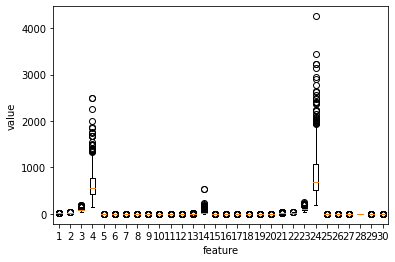

In [ ]:
# 이번에는 산점도가 아니라 밧스 플롯을 이용하여 각 특성의 사분위 값을 나타내 보자.
from matplotlib import pyplot as plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
# 눈에 띄는 특성은,,
# 박스 플롯을 보면 4, 14, 24번째 특성이 다른 특성보다 값의 분포가 훨씬 크네~
# 4, 14, 24 번째 특성의 인덱스를 리스트로 묶어 전달 -> 각 인덱스의 특성을 확인해보자

# 결과를 보면 모두 넓이와 관련된 특성이다..
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
# 타깃 데이터 확인
# 다시 한 번 상기하면, 해결할 문제는 '음성 샘플(정상 종양)'과 '양성 샘플(악성 종양)'을 구분하는 것이다.
# 그래서 cancer. target 배열 안에는 0과 1만 들어 있다 / 0: 음성 , 1: 양성
np.unique(cancer.target, return_counts = True)

(array([0, 1]), array([212, 357]))

In [ ]:
# 위 결과는 음성(0) / 양성 (1) 결과를 나타냄

# 그리고, 음성 212개 / 양성 357 개를 나타냄

In [ ]:
# <훈련 데이터 세트 저장하기>
x = cancer.data
y = cancer.target

# 데이터 세트를 보는 것은 끝 / 로지스틱 회귀를 위한 뉴런을 만들어보자

## 그러나 벗, 그 전에, 훈련된 모델이 실전에서 얼마나 좋은 성능을 내는지 어떻게 알 수 있을까? -> 성능 평가

## 모델의 성능 평가를 위한 훈련 세트와 테스트 세트

## 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙

- 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 한다.

- 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 한다. 

- 전체적인 비율을 유지



In [ ]:
# train_test_split() 함수로 훈련 데이터 세트 나누기
# 훈련 75 / 테스트 25 비율로 나눠준다.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size =0.2, random_state=42)

# 1. stratify = y
#    -> stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만든다. 
#       train_test_split() 함수는 기본적으로 데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형한 경우, stratify를 y로 지정해야한다.
#
# 2. test_size = 0.2
#    -> test 세트 비율 20%
#
# 3. random_state = 42
#    -> 무작위로 데이터를 섞은 다음 나누는데, 난수 초깃값을 42로 지정

In [ ]:
# 4:1의 비율로 잘 나누어지는지 확인
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [ ]:
# unique()로 훈련 세트의 타깃 확인
np.unique(y_train,return_counts = True)
# 전체 훈련 데이터 세트의 클래스 비율과 비슷한 구성

(array([0, 1]), array([170, 285]))

In [ ]:
## 로지스틱 회귀 구현하기
# 정방향으로 데이터가 흘러가는 과정(정방향 계산)
# 가중치를 업데이트하기 위한 역방향으로 데이터가 흘러가는 과정(역방향 계산)
class LogisticNeuron:

  def __init__(self):
      # 입력데이터의 특성이 많으므로 특정한 값으로 초기화하지 않음
      self.w = None
      self.b = None

  def forpass(self,x):
    z = np.sum(x*self.w) + self.b # 직선 방정식을 계산한다.
    return z
  
  def backprop(self,x,err):
    # 가중치에 대한 gradient : w_grad / 절편에 대한 gradient : b_grad
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  def activation(self,z):
    # 시그모이드 함수 a
    a = 1 / (1 + np.exp(-z))
    return a

  ## 훈련하는 메서드 구현하기
  # 훈련을 수행하는 fit()
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화한다. / x.shape[1] -> 열 개수
    self.b = 0                        # 절편을 초기화한다.

    for i in range(epochs):           # epochs 만큼 반복
      for x_i, y_i in zip(x,y):       # 모든 샘플에 대해 반복
        z = self.forpass(x_i)              # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y_i - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x_i,err) # 역방향 계산
        self.w -= w_grad
        self.b -= b_grad

  ## 예측하는 메서드 구현
  # x가 2차원 배열로 전달된다고 가정하고 구현
  # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서대로 통과시키면서 구할 수 있다.
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    a = self.activation(np.array(z))      # 활성화 함수 적용
    return a > 0.5                        # step function(계단 함수) 적용

In [ ]:
## 로지스틱 회귀 모델 훈련시키기
# 1. 모델 훈련
neuron = LogisticNeuron()
neuron.fit(x_train,y_train)

np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [ ]:
# accuracy가 0.82 수준임! (82% 정확도)


# 로지스틱 회귀 뉴런으로 단일층 신경망을 만들어보자.
## 이제까지 한것으로 이미 단일층 신경망을 구현한 것임(single layer neural network)
## 하지만 아직 layer의 개념을 사용하지 않았음


## 일반적으로 신경망 => 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)로 구성됨

## 단일층 신경망의 모습

- 앞서 구현한 로지스틱 회귀는 은닉층이 없는 신경망이라 볼 수 있겠다. 이런 신경망을 단일층 신경망이라 함.

In [ ]:
## 단일층 신경망 예시
class SingleLayer:

  def __init__(self):
      # 입력데이터의 특성이 많으므로 특정한 값으로 초기화하지 않음
      self.w = None
      self.b = None
      self.losses = [] ## 손실 함수의 결과값을 저장할 리스트! / 샘플마다 손실 함수를 계산하고, 그 결과값을 모두 더하여 샘플로 나눈 평균값을 저장함.

  def forpass(self,x):
    z = np.sum(x*self.w) + self.b # 직선 방정식을 계산한다.
    return z
  
  def backprop(self,x,err):
    # 가중치에 대한 gradient : w_grad / 절편에 대한 gradient : b_grad
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  def activation(self,z):
    # 시그모이드 함수 a
    a = 1 / (1 + np.exp(-z))
    return a

  ## 훈련하는 메서드 구현하기
  # 훈련을 수행하는 fit()
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화한다. / x.shape[1] -> 열 개수
    self.b = 0                        # 절편을 초기화한다.

    for i in range(epochs):           # epochs 만큼 반복
      loss = 0
      ## 인덱스를 섞는다.
      # 그러니까, 여러행의 순서를 섞는다. -> 가중치 최적화 탐색 과정이 다양해지겠다.
      indexes = np.random.permutation(np.arange(len(x))) 
      for i in indexes:       # 모든 샘플에 대해 반복
        z = self.forpass(x[i])              # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i],err) # 역방향 계산
        self.w -= w_grad
        self.b -= b_grad

        ## ----- 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적한다.
        # a가 0에 가까워지면 np.log() 함수값이 음의 무한대가 되고, a가 1에 가까워지면 np.log()함수값이 0이 되기 때문에
        # a의 값이 -1e-10 ~ 1-1e10 사이가 되도록 조정
        # 이때 np.clip() 사용 -> 범위 밖의 값을 잘라낸다.
        a = np.clip(a, 1e-10,1-1e-10)
        # 매 epoch 마다 손실을 저장한다.
        loss += -(y[i]*np.log(a) + (a-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  ## 예측하는 메서드 구현
  # x가 2차원 배열로 전달된다고 가정하고 구현
  # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서대로 통과시키면서 구할 수 있다.
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0                # 계단 함수 적용
    # a = self.activation(np.array(z))      # 활성화 함수 적용
    #return a > 0.5                        # step function(계단 함수) 적용
  def score(self, x,y):
    return np.mean(self.predict(x) == y)


In [ ]:
## 단일층 신경망 훈련하기!
layer = SingleLayer()
layer.fit(x_train,y_train)
layer.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.9298245614035088

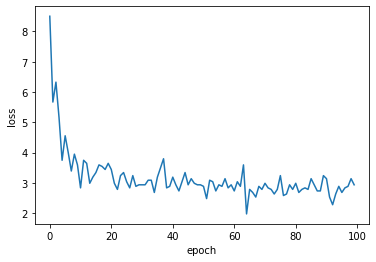

In [ ]:
# 매 에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄였기 때문에 성능이 향상되었다.
# 손실 함수 누적값을 확인해보자

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## 사이킷런의 SGDClassifier에는 이미 이런 것들이 구현되어 있다.

- 이것을 이용하여 로지스틱 회귀 문제를 간단히 해결해 보자.


In [ ]:
# SDGClassifier 클래스에 로지스틱 회귀를 적용하려면 loss 매개변수에 손실 함수로 log를 지정한다.
from sklearn.linear_model import SGDClassifier
# tol : stop condition
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)

In [ ]:
# 사이킷런으로 훈련하고 평가하기
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)


0.8333333333333334

In [ ]:
# 사이킷런으로 예측하기
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])